D:\file_cleanser\fileCleanser\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\file_cleanser\fileCleanser\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


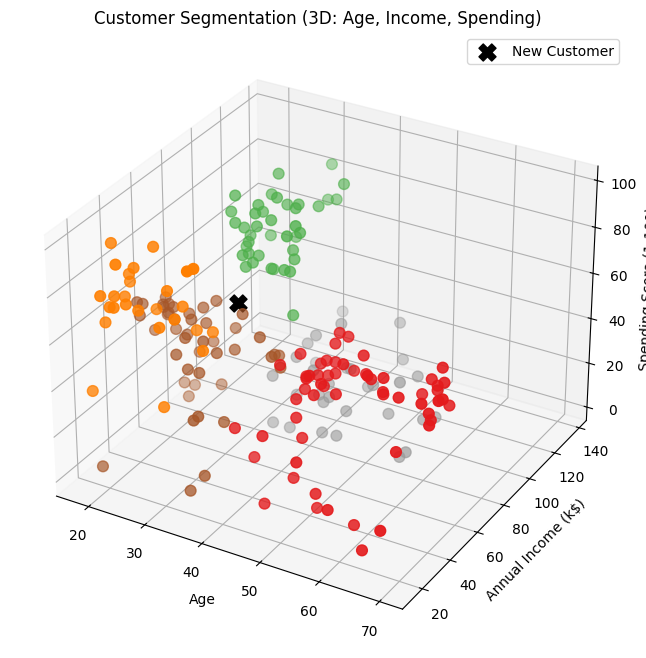

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D projection

# Load dataset
data = pd.read_csv(r"C:\Users\premr\.cache\kagglehub\datasets\vjchoudhary7\customer-segmentation-tutorial-in-python\versions\1\Mall_Customers.csv")

# Features for clustering
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster labeling (based on Age, Income, Spending)
cluster_summary = data.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()
labels_dict = {}
for idx, row in cluster_summary.iterrows():
    age, income, spending = row
    if age < 35 and income > 60 and spending > 60:
        labels_dict[idx] = 'Young High Income High Spenders'
    elif age < 35 and income <= 60 and spending > 60:
        labels_dict[idx] = 'Young Low Income High Spenders'
    elif age < 35 and spending <= 60:
        labels_dict[idx] = 'Young Average Spenders'
    elif age >= 35 and income > 60 and spending > 60:
        labels_dict[idx] = 'Adult High Income High Spenders'
    elif age >= 35 and spending > 60:
        labels_dict[idx] = 'Adult High Spenders'
    else:
        labels_dict[idx] = 'Adult Average Spenders'

data['Cluster_Label'] = data['Cluster'].map(labels_dict)

# Train regression to predict Spending Score
X_reg = data[['Age', 'Annual Income (k$)']]
y_reg = data['Spending Score (1-100)']
regressor = LinearRegression()
regressor.fit(X_reg, y_reg)

# Predictor function
def predict_customer_profile(age, income):
    spending_pred = regressor.predict([[age, income]])[0]
    scaled_features = scaler.transform([[age, income, spending_pred]])
    cluster = kmeans.predict(scaled_features)[0]
    label = labels_dict.get(cluster, 'Other')
    return spending_pred, cluster, label

# Example new customer
new_age = 30
new_income = 70
spending_pred, cluster_pred, label_pred = predict_customer_profile(new_age, new_income)

# 3D Scatter Plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    data['Age'],
    data['Annual Income (k$)'],
    data['Spending Score (1-100)'],
    c=data['Cluster'],
    cmap='Set1',
    s=60
)
# Plot new customer
ax.scatter(new_age, new_income, spending_pred, color='black', s=150, label='New Customer', marker='X')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title("Customer Segmentation (3D: Age, Income, Spending)")
ax.legend()
plt.show()


In [17]:
def predict_customer_cluster(age, income, spending):
    """
    Predicts the cluster and descriptive label for a new customer.
    
    Parameters:
    - age: int or float
    - income: int or float (Annual Income in k$)
    - spending: int or float (Spending Score 1-100)
    
    Returns:
    - cluster: int (KMeans cluster index)
    - label: str (descriptive cluster label)
    """
    # Step 1: Create a dataframe
    new_customer = pd.DataFrame([[age, income, spending]], columns=['Age','Annual Income (k$)','Spending Score (1-100)'])
    
    # Step 2: Scale features (using the same scaler)
    new_customer_scaled = scaler.transform(new_customer)
    
    # Step 3: Predict cluster
    cluster = kmeans.predict(new_customer_scaled)[0]
    
    # Step 4: Get descriptive label
    label = labels_dict.get(cluster, 'Other')
    
    return cluster, label

In [18]:
age,income,spending=input("enter age"),input("enter income"),input('enter spending')
print(predict_customer_cluster(age,income,spending))

enter age 19
enter income 20
enter spending 40


(np.int32(3), 'Young Average Spenders')


2025-09-12 15:46:07.673 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-12 15:46:07.675 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-12 15:46:08.281 
  command:

    streamlit run D:\file_cleanser\fileCleanser\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-09-12 15:46:08.282 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-12 15:46:08.284 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-12 15:46:08.285 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-12 15:46:08.286 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when

DeltaGenerator()

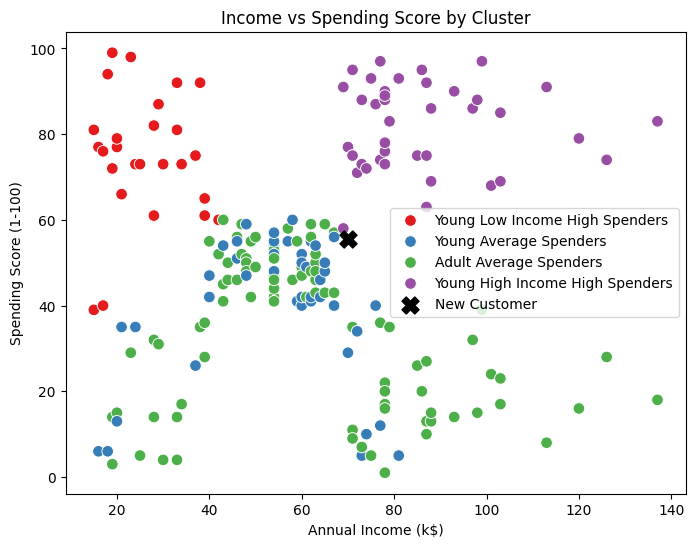

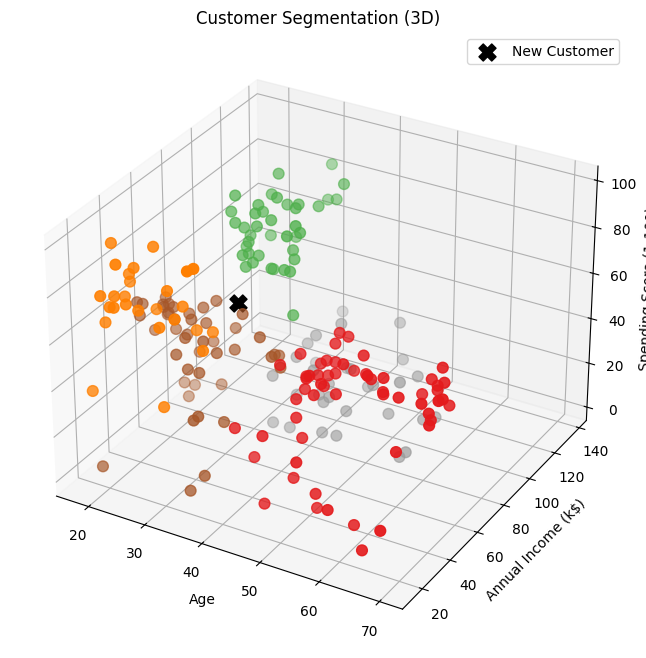

In [20]:
# Save this as app.py and run using: streamlit run app.py

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

st.set_page_config(page_title="Mall Customer Profiler", layout="wide")

st.title("Mall Customer Profiling Tool")
st.write("Predict Spending Score and Cluster Label based on Age and Annual Income.")

# Load dataset
@st.cache_data
def load_data():
    return pd.read_csv(r"C:\Users\premr\.cache\kagglehub\datasets\vjchoudhary7\customer-segmentation-tutorial-in-python\versions\1\Mall_Customers.csv")

data = load_data()

# Train KMeans and scaler
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster labeling
cluster_summary = data.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()
labels_dict = {}
for idx, row in cluster_summary.iterrows():
    age, income, spending = row
    if age < 35 and income > 60 and spending > 60:
        labels_dict[idx] = 'Young High Income High Spenders'
    elif age < 35 and income <= 60 and spending > 60:
        labels_dict[idx] = 'Young Low Income High Spenders'
    elif age < 35 and spending <= 60:
        labels_dict[idx] = 'Young Average Spenders'
    elif age >= 35 and income > 60 and spending > 60:
        labels_dict[idx] = 'Adult High Income High Spenders'
    elif age >= 35 and spending > 60:
        labels_dict[idx] = 'Adult High Spenders'
    else:
        labels_dict[idx] = 'Adult Average Spenders'
data['Cluster_Label'] = data['Cluster'].map(labels_dict)

# Train regression for Spending Score
X_reg = data[['Age', 'Annual Income (k$)']]
y_reg = data['Spending Score (1-100)']
regressor = LinearRegression()
regressor.fit(X_reg, y_reg)

# Predictor function
def predict_customer_profile(age, income):
    spending_pred = regressor.predict([[age, income]])[0]
    scaled_features = scaler.transform([[age, income, spending_pred]])
    cluster = kmeans.predict(scaled_features)[0]
    label = labels_dict.get(cluster, 'Other')
    return spending_pred, cluster, label

# Streamlit Inputs
st.sidebar.header("Enter Customer Details")
age_input = st.sidebar.number_input("Age", min_value=18, max_value=70, value=30)
income_input = st.sidebar.number_input("Annual Income (k$)", min_value=10, max_value=200, value=70)

# Predict
spending_pred, cluster_pred, label_pred = predict_customer_profile(age_input, income_input)

st.subheader("Prediction Results")
st.write(f"**Predicted Spending Score:** {spending_pred:.2f}")
st.write(f"**Predicted Cluster:** {cluster_pred}")
st.write(f"**Cluster Label:** {label_pred}")

# 2D Plot: Income vs Spending
st.subheader("2D Plot: Income vs Spending Score")
fig2d, ax2d = plt.subplots(figsize=(8,6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster_Label', palette='Set1', s=70, ax=ax2d)
ax2d.scatter(income_input, spending_pred, color='black', s=150, label='New Customer', marker='X')
ax2d.set_xlabel("Annual Income (k$)")
ax2d.set_ylabel("Spending Score (1-100)")
ax2d.set_title("Income vs Spending Score by Cluster")
ax2d.legend()
st.pyplot(fig2d)

# 3D Plot: Age, Income, Spending
st.subheader("3D Plot: Age vs Income vs Spending Score")
fig3d = plt.figure(figsize=(10,8))
ax3d = fig3d.add_subplot(111, projection='3d')
scatter = ax3d.scatter(
    data['Age'],
    data['Annual Income (k$)'],
    data['Spending Score (1-100)'],
    c=data['Cluster'],
    cmap='Set1',
    s=60
)
ax3d.scatter(age_input, income_input, spending_pred, color='black', s=150, label='New Customer', marker='X')
ax3d.set_xlabel("Age")
ax3d.set_ylabel("Annual Income (k$)")
ax3d.set_zlabel("Spending Score (1-100)")
ax3d.set_title("Customer Segmentation (3D)")
ax3d.legend()
st.pyplot(fig3d)
